# Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

## 1.Plotting the data

In [1]:
#Análisis de datos
import pandas as pd
import numpy as np

#Visualización 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

headers = ['Population of City in 10,000s','Profit in $10,000s']
df = pd.read_csv('ex1data1.txt', header=None, names=headers)
df.head()

,"Population of City in 10,000s","Profit in $10,000s"
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


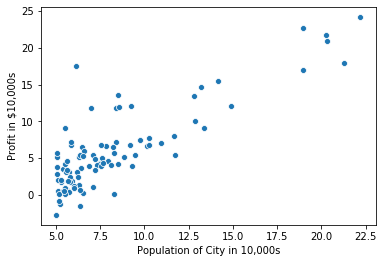

In [2]:
#Particionamos nuestra base de datos
m,n = df.shape #number of training examples
df.insert(0, "0's", np.ones((m,1)), True) #Add a column of ones to x
X = df[["0's", "Population of City in 10,000s"]].values
y = df['Profit in $10,000s'].values.reshape((m,1))

#Visualización
ax = sns.scatterplot(x=df.iloc[:,1], y=df.iloc[:,2], data=df)

## 2.Gradient Descent
In this section, you will fit the linear regression parameters to our dataset using gradient descent.

The objective of linear regression is to minimize the cost function:

$$ J\left(\theta \right)=\frac{1}{2m}\sum_{i=1}^m {\left(h_{\theta \;} \left(x^{\left(i\right)} \right)-y^{\left(i\right)} \right)}^2$$

where the hypothesis $h_{\theta}(x)$  is given by the linear model

$$ h_{\theta } \left(x\right)=\theta^T x=\theta_0 +\theta_1 x_1 $$

One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update

$$ \theta_j :=\theta_j -\alpha \frac{\;1}{m}\sum_{i=1}^m \;\left(h_{\theta \;} \left(x^{\left(i\right)} \right)-y^{\left(i\right)} \right)x_j^{\left(i\right)} \;\;\;\;\;\;\;\left(\mathrm{simultaneously}\;\mathrm{update}\;\theta_{j\;} \;\mathrm{for}\;\mathrm{all}\;j\right) $$

With each step of gradient descent, your parameters  come closer to the optimal values that will achieve the lowest cost.




### 2.1.Implementation

In [3]:
theta = np.zeros((n,1)) #initialize fitting parameters
iterations = 1500
alpha = 0.01

As you perform gradient descent to minimize the cost function , it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate  so you can check the convergence of your gradient descent implementation.

### 2.2.Computing the cost 

In [4]:
#Cost function
def computeCost(x, y, theta):
    m = len(x)
    hypoth = x @ theta;
    a = hypoth - y;
    return ((a.T @ a)/ (2 * m)).ravel()

computeCost(X, y, theta)

array([32.07273388])

Next we call computeCost again, this time with non-zero theta values as an additional test. You should expect to see an output of 54.24 below:

In [5]:
#Compute and display initial cost with non-zero theta
computeCost(X, y,[[-1],[2]])

array([54.24245508])

### 2.3.Gradient descent

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost  is parameterized by the vector , not  and . That is, we minimize the value of  by changing the values of the vector , not by changing X or y.

A good way to verify that gradient descent is working correctly is to look at the value of J and check that it is decreasing with each step. Assuming you have implemented gradient descent and computeCost correctly, your value of  should never increase, and should converge to a steady value by the end of the algorithm.

Your final values for  will also be used to make predictions on profits in areas of 35,000 and 70,000 people.

In [6]:
def gradientDescent(x, y, theta, alpha, num_iters):
    m = len(y)
    J_hist =[]
    
    for i in range(num_iters):
        hypoth = x @ theta
        error = x.T @ (hypoth - y)
        descent = alpha * error * (1/m);
        theta = theta - descent
        J_hist.append(computeCost(x,y,theta))
    
    return theta, J_hist

In [7]:
theta, J_history = gradientDescent(X,y,theta,0.01,1500)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


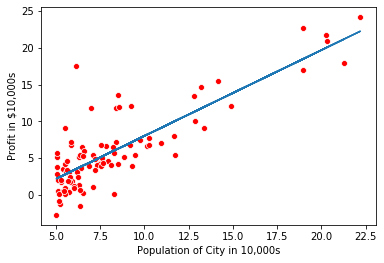

In [8]:
#Plotting the linear fit
linear_func = lambda x: x @ theta
ax = sns.scatterplot(x=df['Population of City in 10,000s'], 
                     y=df['Profit in $10,000s'],color="r", data=df)
plt.plot(df['Population of City in 10,000s'], linear_func(X))

It is also possible to enhance a scatterplot to include a linear regression model (and its uncertainty) using $lmplot()$:

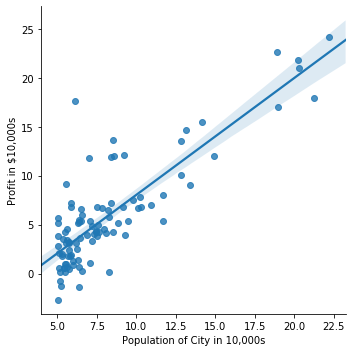

In [9]:
sns.lmplot(x="Population of City in 10,000s", y="Profit in $10,000s",data=df)

In [10]:
#Predict values for a population of size 35,000
predict1 = (np.array([[1, 3.5]]) @ theta).ravel()
r1 = predict1 * 10000
print("For population = 35,000, we predict a profit of {:.2f}".format(r1[0]))

For population = 35,000, we predict a profit of 4519.77


In [11]:
#Predict values for a population of size 70,000
predict2 = (np.array([[1, 7]]) @ theta).ravel()
r2 = predict2 * 10000
print("For population = 70,000, we predict a profit of {:.2f}".format(r2[0]))

For population = 70,000, we predict a profit of 45342.45


### 2.4.Visualizing 


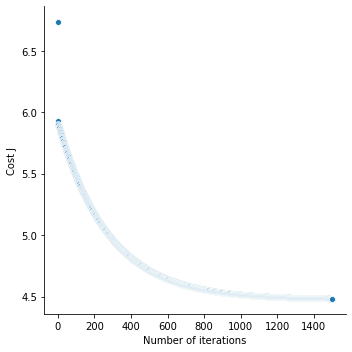

In [12]:
#Plot the convergence graph
dic = {'Number of iterations': range(iterations), 'Cost J':J_history}
df_jhist = pd.DataFrame(dic)
sns.relplot(x='Number of iterations', y='Cost J', data=df_jhist)

## 3. Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.
    The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [25]:
headers = ['Size','Number of bedrooms', 'Price']
df_2 = pd.read_csv('ex1data2.txt', header=None, names=headers)
df_2.head()

,Size,Number of bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [26]:
#Particionamos nuestra base de datos
m,n = df_2.shape 
X = df_2[['Size', 'Number of bedrooms']]
y = df_2['Price'].values.reshape((m,1))

### 3.1. Featured normalization
This section of the script will start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.
Our task here is to create a code to:
+ Subtract the mean value of each feature from the dataset.
+ After subtracting the mean, additionally scale (divide) the feature values by their respective "standard deviations".

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within  standard deviations of the mean); this is an alternative to taking the range of values (max - min). You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix X corresponds to one feature.

Implementation Note: When normalizing the features, it is important to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.

In [27]:
mean = X.mean()
std = X.std()
X_nom = (X - mean) / std

Now that we have normailzed the features, we again add a column of ones corresponding to  to the data matrix X.

In [28]:
X_nom.insert(0, "1's", np.ones((m,1)), True) 
X = X_nom.values

### 3.2. Gradient descent

In [29]:
#Run gradient descent
alpha = 0.1 #Choose some alpha value
num_iters = 400
theta = np.zeros((3, 1)) #Init Theta and Run Gradient Descent 

theta, J_history = gradientDescent(X, y, theta, alpha, num_iters)
print(theta)

[[340412.65957447]
 [110631.04895815]
 [ -6649.47295013]]


Finally, you should complete and run the code below to predict the price of a 1650 sq-ft, 3 br house using the value of theta obtained above. 

In [30]:
p = (np.array([[1, 1.650, 3]]) @ theta).ravel()
price = p * 10000
print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.2f}".format(price[0]))

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $5030054715.05


### 3.3 Normal Equation
In the lecture videos, you learned that the closed-form solution to linear regression is

$$\theta = \left(X^T X\right)^{-1} X^T \vec{y} $$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no "loop until convergence" like in gradient descent.
Remember that while you don't need to scale your features, we still need to add a column of 1's to the X matrix to have an intercept term ($\theta_0$). 

In [31]:
def normalEqn(x,y):
    I = np.linalg.inv(x.T @ x)
    return I @ (x.T @ y)

theta_2 = normalEqn(X, y)
print(theta_2)

[[340412.65957447]
 [110631.05027885]
 [ -6649.47427082]]
